In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sepsis_df = pd.read_csv('sepsis_df.csv')

In [3]:
print(len(sepsis_df.index)," rows x ", len(sepsis_df.columns), "columns")

790215  rows x  43 columns


In [4]:
print("#Patients: ", len(sepsis_df.Patient_ID.unique()))
print("#Records per patient: ", len(sepsis_df.index) / len(sepsis_df.Patient_ID.unique()))


#Patients:  20336
#Records per patient:  38.85793666404406


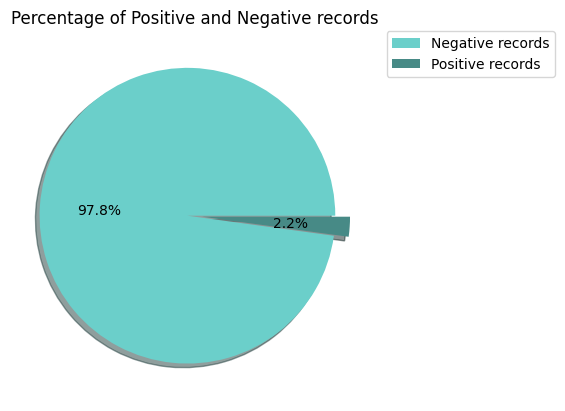

In [5]:
fig, axis = plt.subplots()
data = sepsis_df.SepsisLabel.value_counts()
colors = ['#6bcfca','#478a86','#99ff99','#ffcc99']
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Percentage of Positive and Negative records', ylabel='', labeldistance=None)
ax.legend(['Negative records', 'Positive records'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()
ax.figure.savefig('pos_case_percent.jpg')

In [6]:
sepsis_df_by_patient = sepsis_df.groupby('Patient_ID').max()

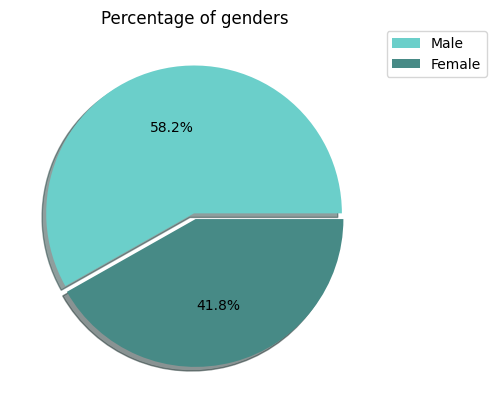

In [7]:
data = sepsis_df_by_patient.Gender.value_counts()
colors = ['#6bcfca','#478a86','#99ff99','#ffcc99']
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.02, 0.02], colors=colors, legend=True, title='Percentage of genders', ylabel='', labeldistance=None)
ax.legend(['Male', 'Female'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()
ax.figure.savefig('gender_percent.jpg')

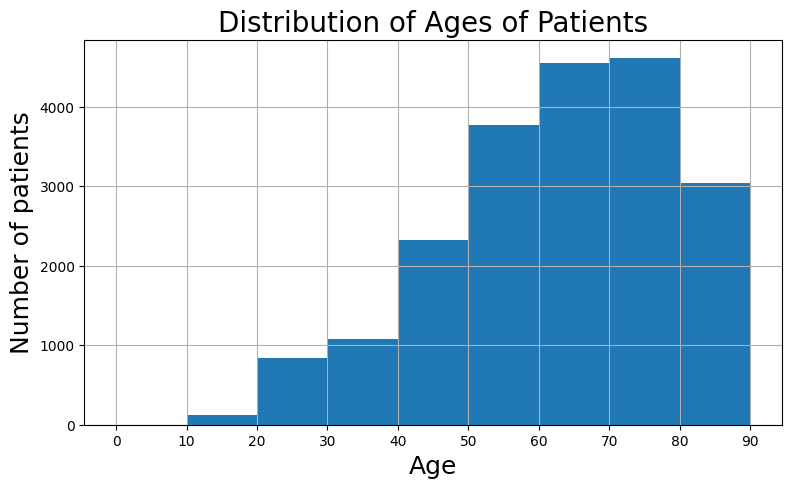

In [8]:
fig, axis = plt.subplots()

x = [i for i in range(0,100,10)]
ax = sepsis_df_by_patient.Age.hist(bins=x, figsize=(9, 5))
plt.xlabel("Age",fontsize=18)
plt.ylabel("Number of patients",fontsize=18)
plt.title("Distribution of Ages of Patients", fontsize=20)
plt.xticks(x)
plt.show()
ax.figure.savefig('age_hist.jpg')

In [9]:
sepsis_df_by_patient.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,53,117.0,100.0,37.44,181.0,141.33,NaN,32.0,NaN,24.0,...,14.7,NaN,338.0,83.14,0,NaN,NaN,-0.03,54,0
2,22,94.0,100.0,36.44,194.0,116.00,66.0,27.0,NaN,NaN,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,23,0
3,47,93.0,99.0,38.61,159.0,99.00,69.0,40.0,NaN,8.0,...,10.0,NaN,488.0,45.82,0,1.0,0.0,-1195.71,48,0
4,28,113.0,100.0,36.78,132.5,84.00,61.5,26.0,NaN,0.0,...,7.6,NaN,220.0,65.71,0,0.0,1.0,-8.77,29,0
5,47,88.0,99.0,37.33,150.0,103.00,NaN,21.0,NaN,NaN,...,8.1,NaN,288.0,28.09,1,1.0,0.0,-0.05,49,0


In [10]:

nan_percentage = sepsis_df.isnull().mean() * 100
high_nan_columns = nan_percentage[nan_percentage > 90].sort_values()
# sepsis_df = sepsis_df.drop(columns=high_nan_columns.index)
print(high_nan_columns)
nan_percentage.mean()

Hgb                  91.164303
PaCO2                91.231753
Chloride             91.676063
BUN                  91.840702
HCO3                 91.949406
Magnesium            92.219712
WBC                  92.489639
Creatinine           93.357884
Platelets            93.482913
Phosphate            94.951247
Calcium              95.024392
SaO2                 95.044387
PTT                  95.152459
Lactate              96.565112
AST                  98.504205
Alkalinephos         98.540650
Bilirubin_total      98.773372
Fibrinogen           99.236917
Bilirubin_direct     99.850420
TroponinI            99.877881
EtCO2               100.000000
dtype: float64


65.04794029414133

In [11]:
sepsis_df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

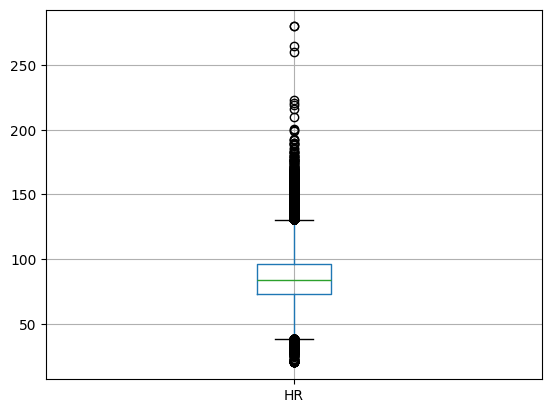

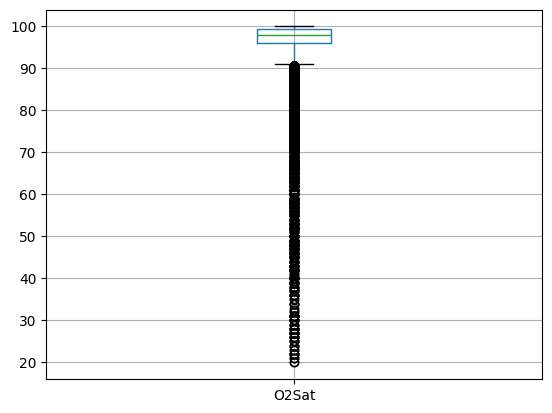

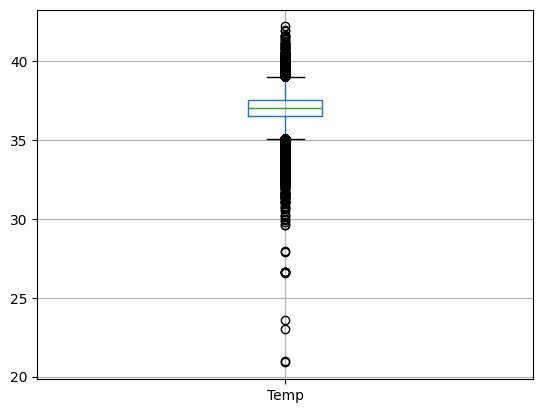

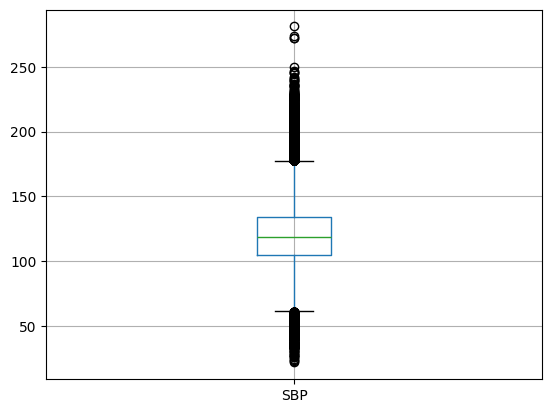

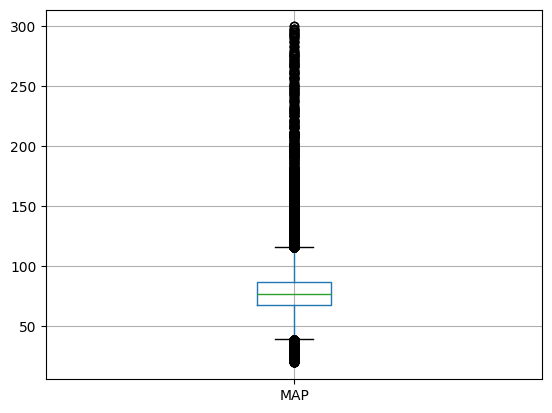

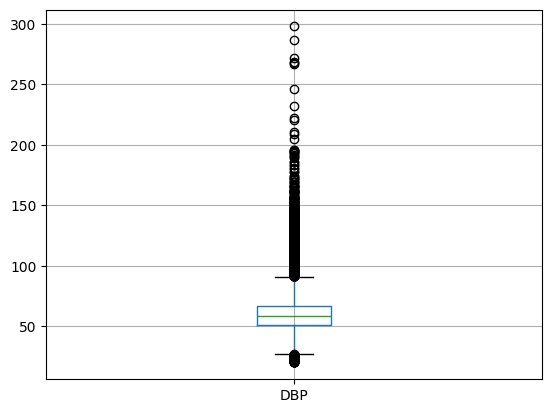

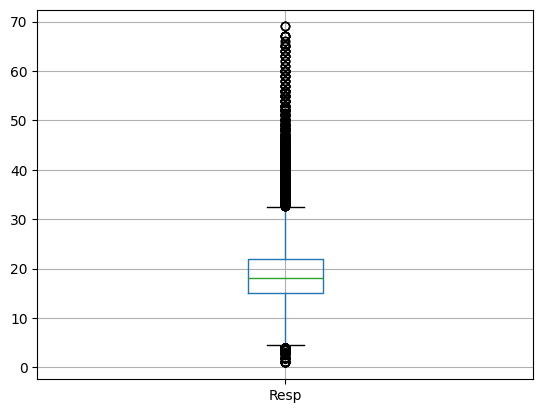

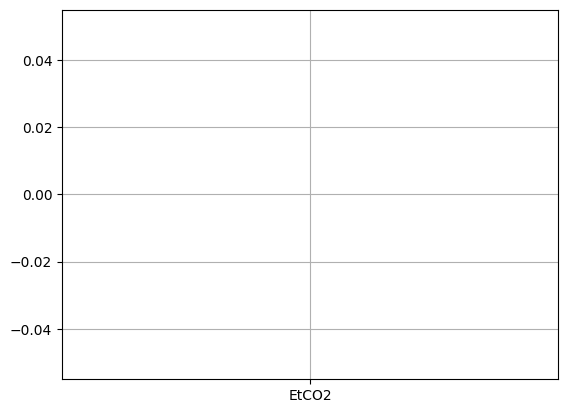

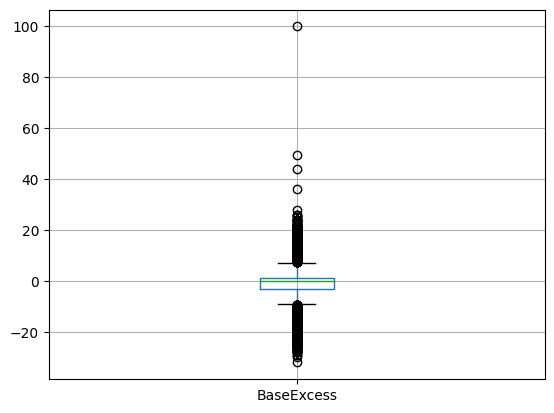

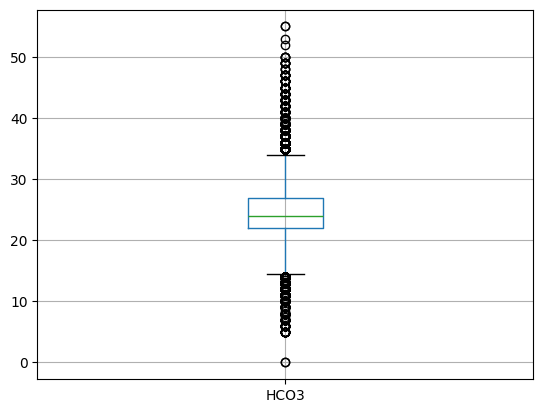

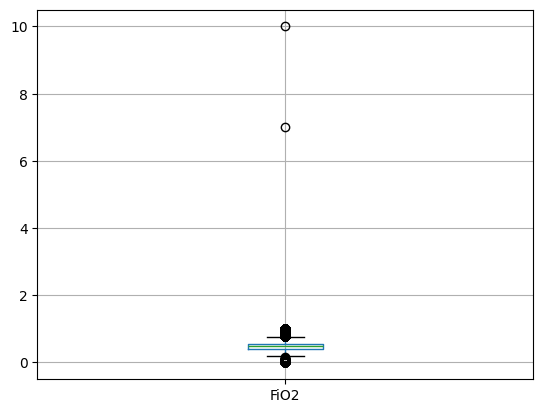

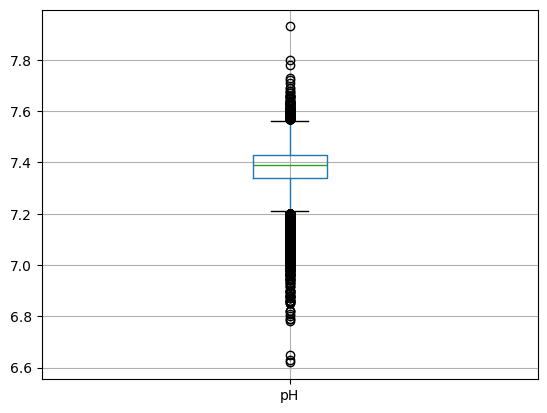

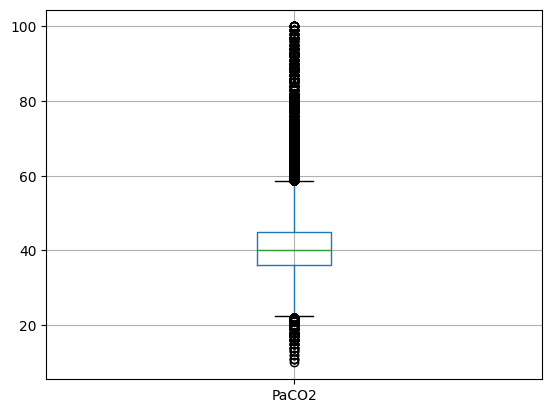

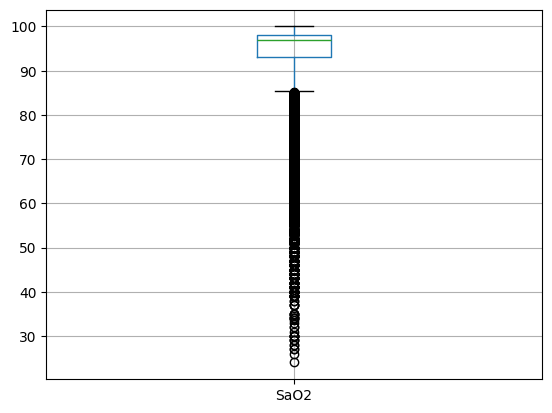

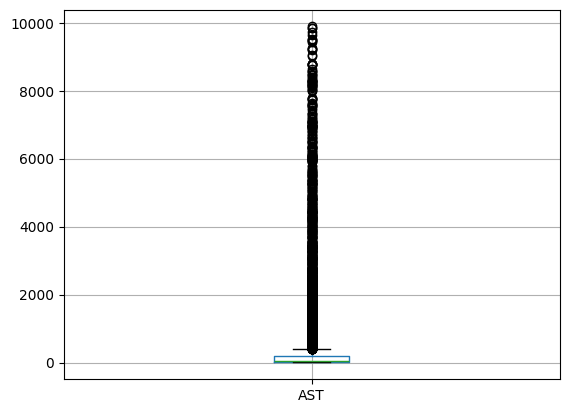

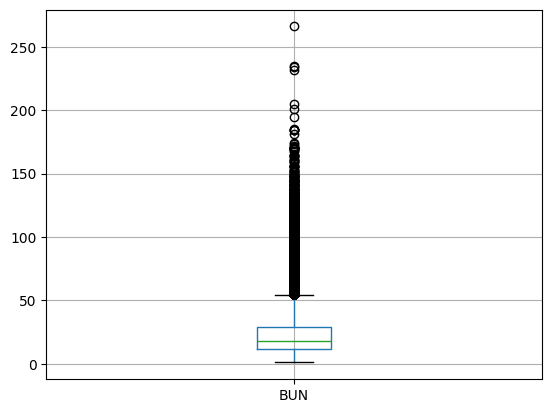

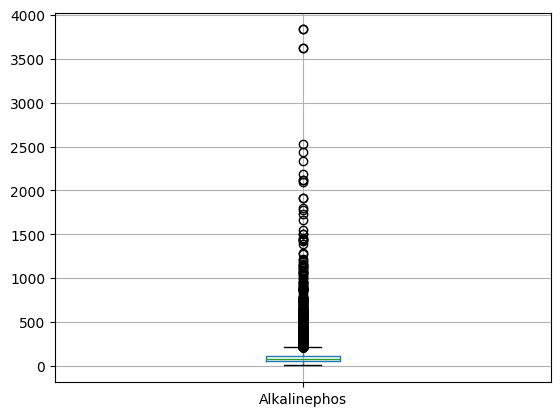

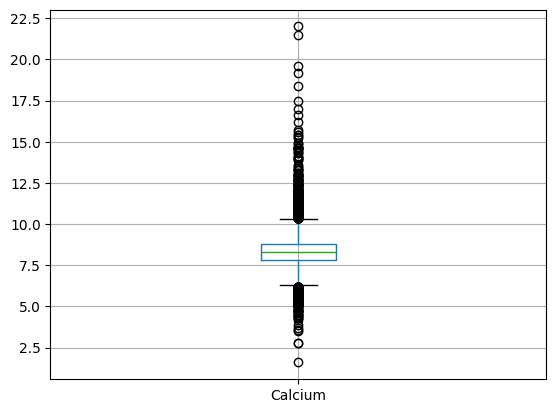

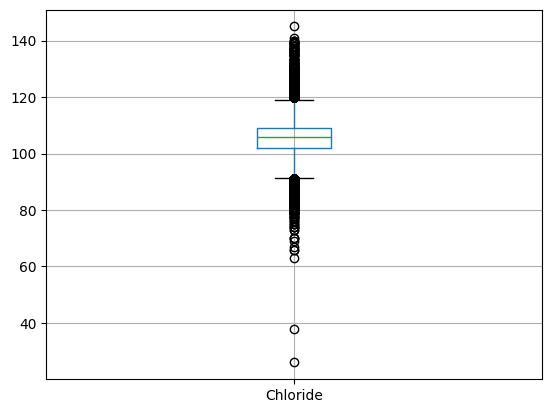

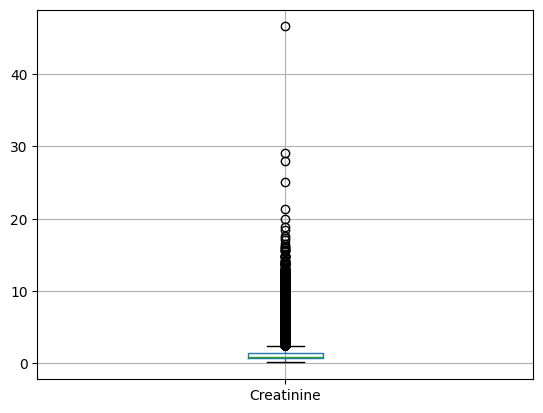

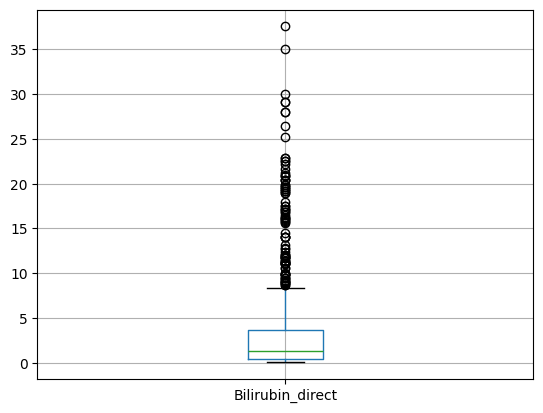

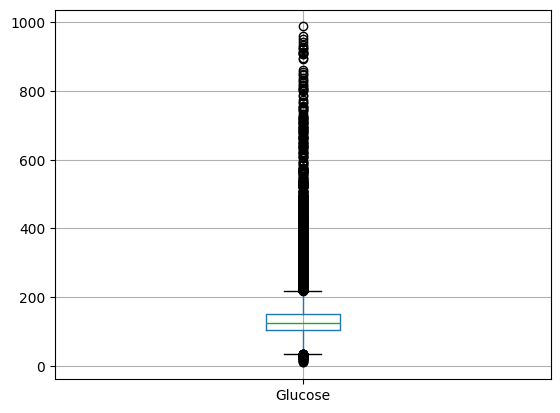

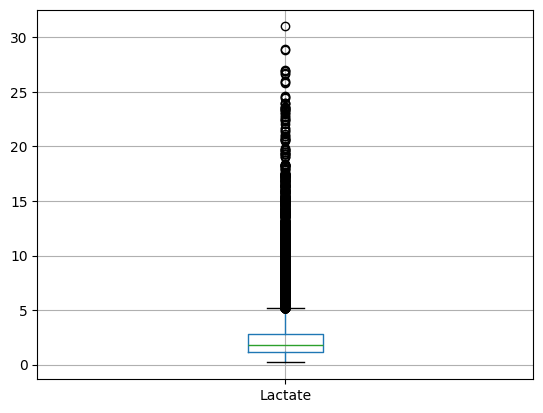

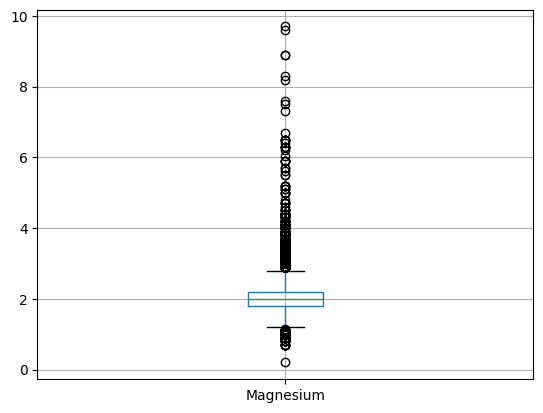

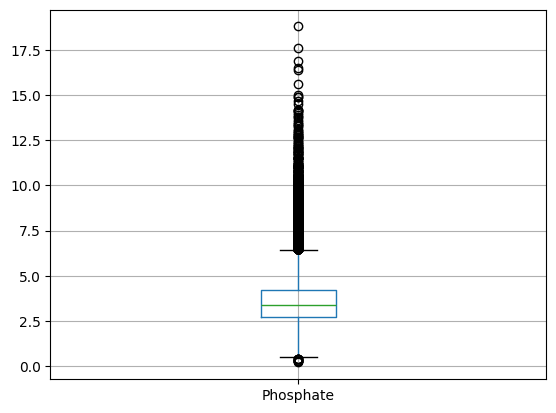

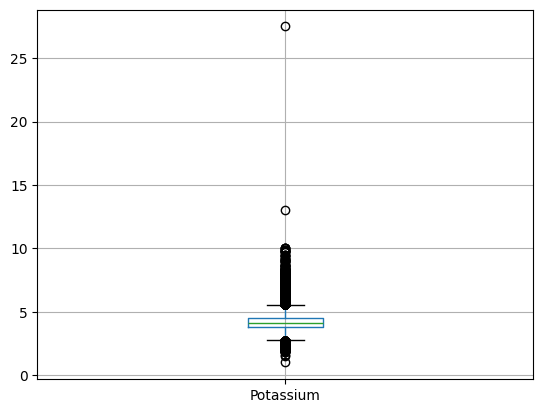

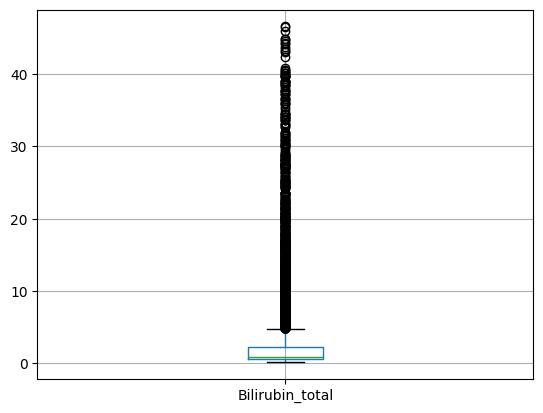

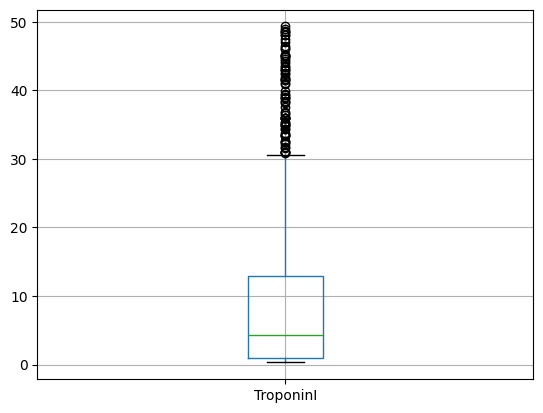

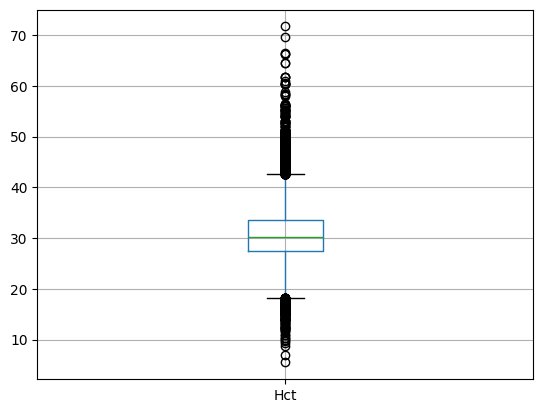

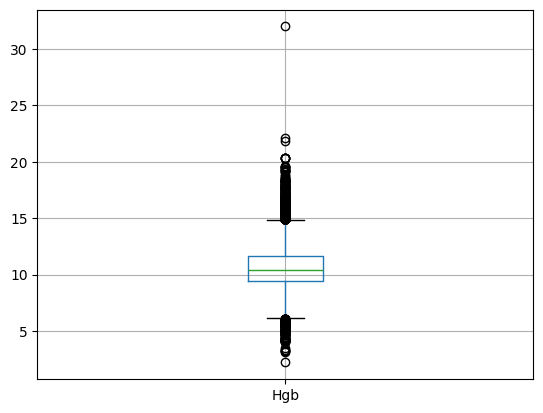

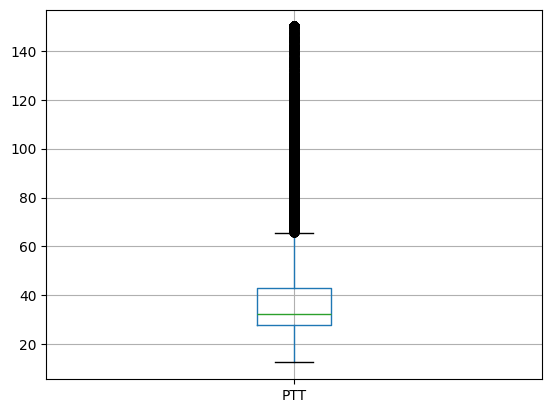

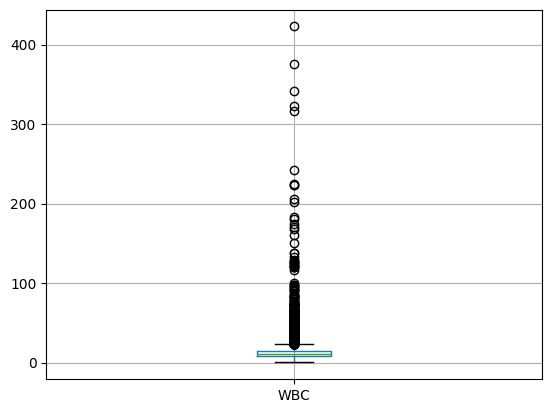

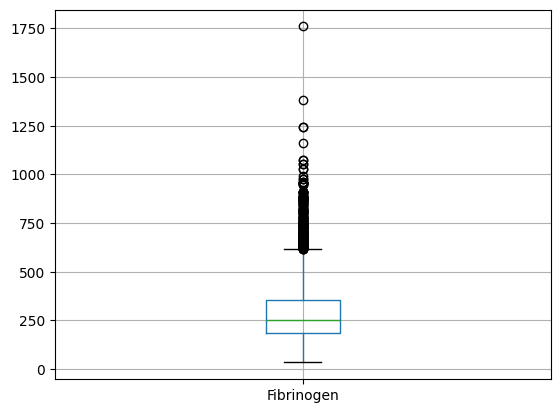

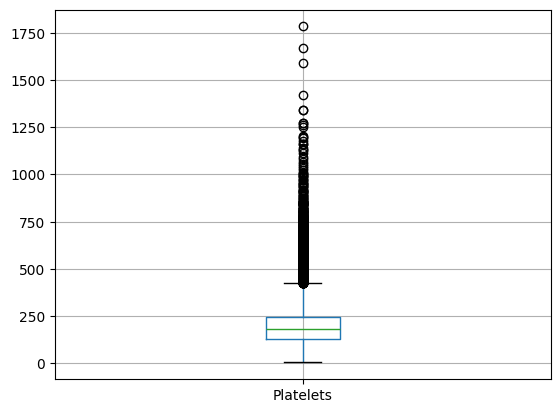

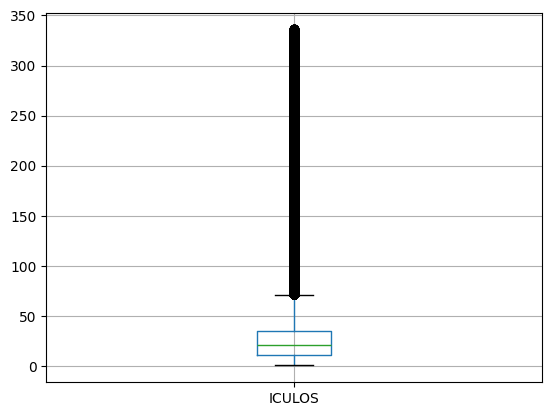

In [12]:
for column in sepsis_df.columns:
    if column not in ['Hour', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'SepsisLabel', 'Patient_ID']:
        sepsis_df.boxplot(column)
        plt.show()

In [13]:
nan_per = 1 - nan_percentage[:40].to_numpy() / 100
print(sepsis_df.columns[:40].values)
nan_df = pd.DataFrame({'feature':sepsis_df.columns[:40].values, 'value': nan_per})
nan_df.to_csv("nan.csv")

nan_per = nan_per.reshape([4,10])

['Hour' 'HR' 'O2Sat' 'Temp' 'SBP' 'MAP' 'DBP' 'Resp' 'EtCO2' 'BaseExcess'
 'HCO3' 'FiO2' 'pH' 'PaCO2' 'SaO2' 'AST' 'BUN' 'Alkalinephos' 'Calcium'
 'Chloride' 'Creatinine' 'Bilirubin_direct' 'Glucose' 'Lactate'
 'Magnesium' 'Phosphate' 'Potassium' 'Bilirubin_total' 'TroponinI' 'Hct'
 'Hgb' 'PTT' 'WBC' 'Fibrinogen' 'Platelets' 'Age' 'Gender' 'Unit1' 'Unit2'
 'HospAdmTime']


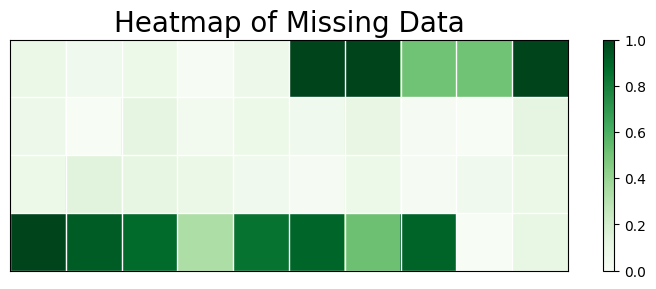

In [14]:
fig, axis = plt.subplots()
heatmap = axis.pcolor(nan_per, cmap='Greens')

axis.set_yticks(np.arange(nan_per.shape[0])+0.5, minor=False)
axis.set_xticks(np.arange(nan_per.shape[1])+0.5, minor=False)

for i in range(nan_per.shape[0]):
    axis.axhline(i, color='white', lw=1)
for i in range(nan_per.shape[1]):
    axis.axvline(i, color='white', lw=1)

axis.set_yticklabels([])
axis.set_xticklabels([])
plt.tick_params(left = False) 
plt.tick_params(bottom = False) 
fig.set_size_inches(9, 3)
plt.title("Heatmap of Missing Data", fontsize = 20) # (lighter color denotes more missing data)
plt.colorbar(heatmap)
# fig, ax = plt.subplots()
# ax.set_xticklabels([])
# ax.set_yticklabels([])
im = ax.imshow(nan_per, cmap='Greens')
plt.savefig("null_heatmap.jpg")

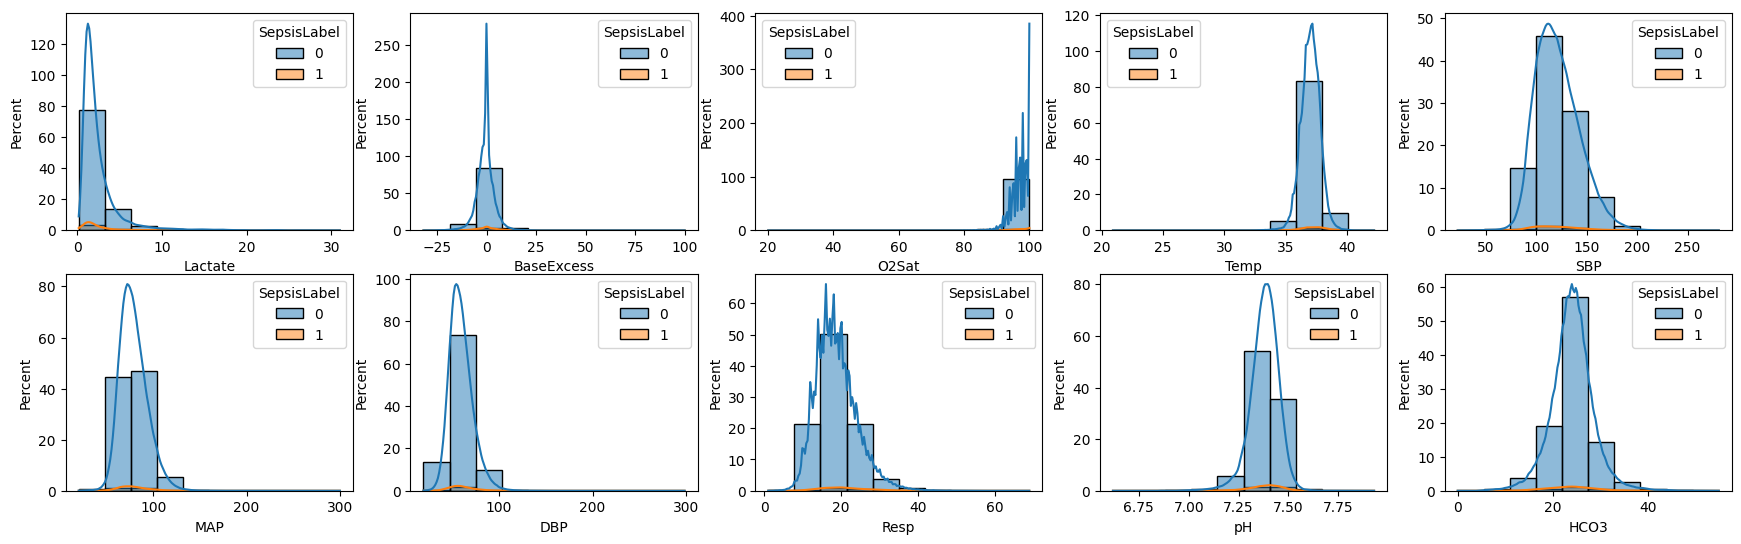

In [15]:
import seaborn as sns
fig, axes = plt.subplots(2,5, figsize=(21.5,6.2))
# 'O2Sat' 'Temp' 'SBP' 'MAP' 'DBP' 'Resp' 'EtCO2' 'BaseExcess'
#  'HCO3' 'FiO2' 'pH' 'PaCO2' 'SaO2' 'AST' 'BUN' 'Alkalinephos'
sns.histplot(data=sepsis_df, x="Lactate",hue="SepsisLabel", kde=True,bins=10,ax=axes[0,0],stat="percent")
sns.histplot(data=sepsis_df, x="BaseExcess",hue="SepsisLabel", kde=True,bins=10,ax=axes[0,1],stat="percent")
sns.histplot(data=sepsis_df, x="O2Sat",hue="SepsisLabel", kde=True,bins=10,ax=axes[0,2],stat="percent")
sns.histplot(data=sepsis_df, x="Temp",hue="SepsisLabel", kde=True,bins=10,ax=axes[0,3],stat="percent")
sns.histplot(data=sepsis_df, x="SBP",hue="SepsisLabel", kde=True,bins=10,ax=axes[0,4],stat="percent")
sns.histplot(data=sepsis_df, x="MAP",hue="SepsisLabel", kde=True,bins=10,ax=axes[1,0],stat="percent")
sns.histplot(data=sepsis_df, x="DBP",hue="SepsisLabel", kde=True,bins=10,ax=axes[1,1],stat="percent")
sns.histplot(data=sepsis_df, x="Resp",hue="SepsisLabel", kde=True,bins=10,ax=axes[1,2],stat="percent")
sns.histplot(data=sepsis_df, x="pH",hue="SepsisLabel", kde=True,bins=10,ax=axes[1,3],stat="percent")
sns.histplot(data=sepsis_df, x="HCO3",hue="SepsisLabel", kde=True,bins=10,ax=axes[1,4],stat="percent")
plt.ticklabel_format(style='scientific', axis='y')
plt.show()
fig.savefig("all_hist.jpg")

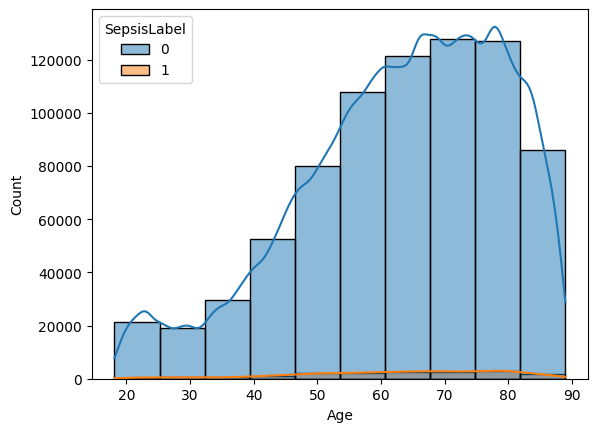

In [16]:
ax = sns.histplot(data=sepsis_df, x="Age",hue="SepsisLabel", kde=True,bins=10)
ax.figure.savefig("age_hist2.jpg")